<a href="https://colab.research.google.com/github/Adukemi/MyProjects/blob/main/Recipe_Site_Traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score

In [32]:
# importing data

df = pd.read_csv("recipe_site_traffic_2212.csv",index_col='recipe')
df

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
1,NaN,NaN,NaN,NaN,Pork,6,High
2,35.48,38.56,0.66,0.92,Potato,4,High
3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
4,97.03,30.56,38.63,0.02,Beverages,4,High
5,27.05,1.85,0.80,0.53,Beverages,4,NaN
...,...,...,...,...,...,...,...
943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,NaN
944,NaN,NaN,NaN,NaN,Potato,2,High
945,951.74,29.42,3.57,13.87,Pork,2,High


In [33]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 947 entries, 1 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      895 non-null    float64
 1   carbohydrate  895 non-null    float64
 2   sugar         895 non-null    float64
 3   protein       895 non-null    float64
 4   category      947 non-null    object 
 5   servings      947 non-null    object 
 6   high_traffic  574 non-null    object 
dtypes: float64(4), object(3)
memory usage: 59.2+ KB


# **Data Validation**

The columns calories, carbohydrate, sugar, and protein were retained as it is, with their data type set to numeric. In contrast, the columns category, servings, and high_traffic were transformed into the categorical data type for better alignment with their qualitative nature.

In the high_traffic column, the administrator labeled high-traffic instances as High while leaving other entries blank. To standardize the data, I replaced the empty values with Low and renamed the column to traffic for clarity and consistency.

In the 'servings' column, inconsistencies in the input data were identified. These were corrected, and the column was converted to a categorical data type since it contains only four distinct possible values.

The missing values in calories, carbohydrate, sugar, and protein were filled with median of each numerics column.

In [34]:
# Data type validation and cleaning

# Replacing the Chicken Breast with Chicken and rechecking the unique values
df['category'] = df['category'].astype(str).str.replace('Chicken Breast', 'Chicken')
df['category'] = df['category'].astype('category')
print("category:\n", df['category'].unique())

# Fixing the high_traffic column
df['traffic'] = df['high_traffic'].astype('category')
df['traffic'] = df['traffic'].cat.add_categories('Low')
df["traffic"] = df["traffic"].fillna('Low')
df.drop(columns=['high_traffic'], inplace=True)
print("\ntraffic:\n", df['traffic'].unique())

# Fixing the servings column
df['servings'] = df['servings'].str.replace(' as a snack','')
df['servings'] = df['servings'].astype('category')
print("\nservings:\n", df['servings'].unique())

df.drop_duplicates(inplace=True)

#df.head()
print("")
print(df.isna().sum().sort_values())
#df.info()

category:
 ['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal', 'Chicken', 'Lunch/Snacks', 'Vegetable', 'Meat', 'Dessert']
Categories (10, object): ['Beverages', 'Breakfast', 'Chicken', 'Dessert', ..., 'One Dish Meal', 'Pork',
                          'Potato', 'Vegetable']

traffic:
 ['High', 'Low']
Categories (2, object): ['High', 'Low']

servings:
 ['6', '4', '1', '2']
Categories (4, object): ['1', '2', '4', '6']

category         0
servings         0
traffic          0
calories        27
carbohydrate    27
sugar           27
protein         27
dtype: int64


In [35]:
# Descriptive Statistics
df.describe()

,calories,carbohydrate,sugar,protein
count,895.000000,895.000000,895.000000,895.000000
mean,435.939196,35.069676,9.046547,24.149296
std,453.020997,43.949032,14.679176,36.369739
min,0.140000,0.030000,0.010000,0.000000
25%,110.430000,8.375000,1.690000,3.195000
50%,288.550000,21.480000,4.550000,10.800000
75%,597.650000,44.965000,9.800000,30.200000
max,3633.160000,530.420000,148.750000,363.360000


In [36]:
# Filling the missing values with medians of each numerics column

for col in ['calories', 'carbohydrate', 'sugar', 'protein']:
    df[col] = df[col].fillna(df[col].median())

# Verifying the validation and cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 922 entries, 1 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   calories      922 non-null    float64 
 1   carbohydrate  922 non-null    float64 
 2   sugar         922 non-null    float64 
 3   protein       922 non-null    float64 
 4   category      922 non-null    category
 5   servings      922 non-null    category
 6   traffic       922 non-null    category
dtypes: category(3), float64(4)
memory usage: 39.4 KB


# Exploratory **Analysis**

In [37]:
# Data afer validation and cleaning
df.head()

,calories,carbohydrate,sugar,protein,category,servings,traffic
recipe,,,,,,,
1,288.55,21.48,4.55,10.80,Pork,6,High
2,35.48,38.56,0.66,0.92,Potato,4,High
3,914.28,42.68,3.09,2.88,Breakfast,1,Low
4,97.03,30.56,38.63,0.02,Beverages,4,High
5,27.05,1.85,0.80,0.53,Beverages,4,Low


**Detecting and Handling Outlier**

The boxplots below visualize the distribution of Calories, Carbohydrates, Sugar, and Protein in the dataset to identify typical ranges and potential outliers.

The majority of values for all variables are tightly clustered within the lower range, as shown by the compact interquartile boxes. And significant outliers exist in all variables, with some extremely high values in Calories (over 3500), Carbohydrates (over 500), Sugar (over 140), and Protein (over 300).

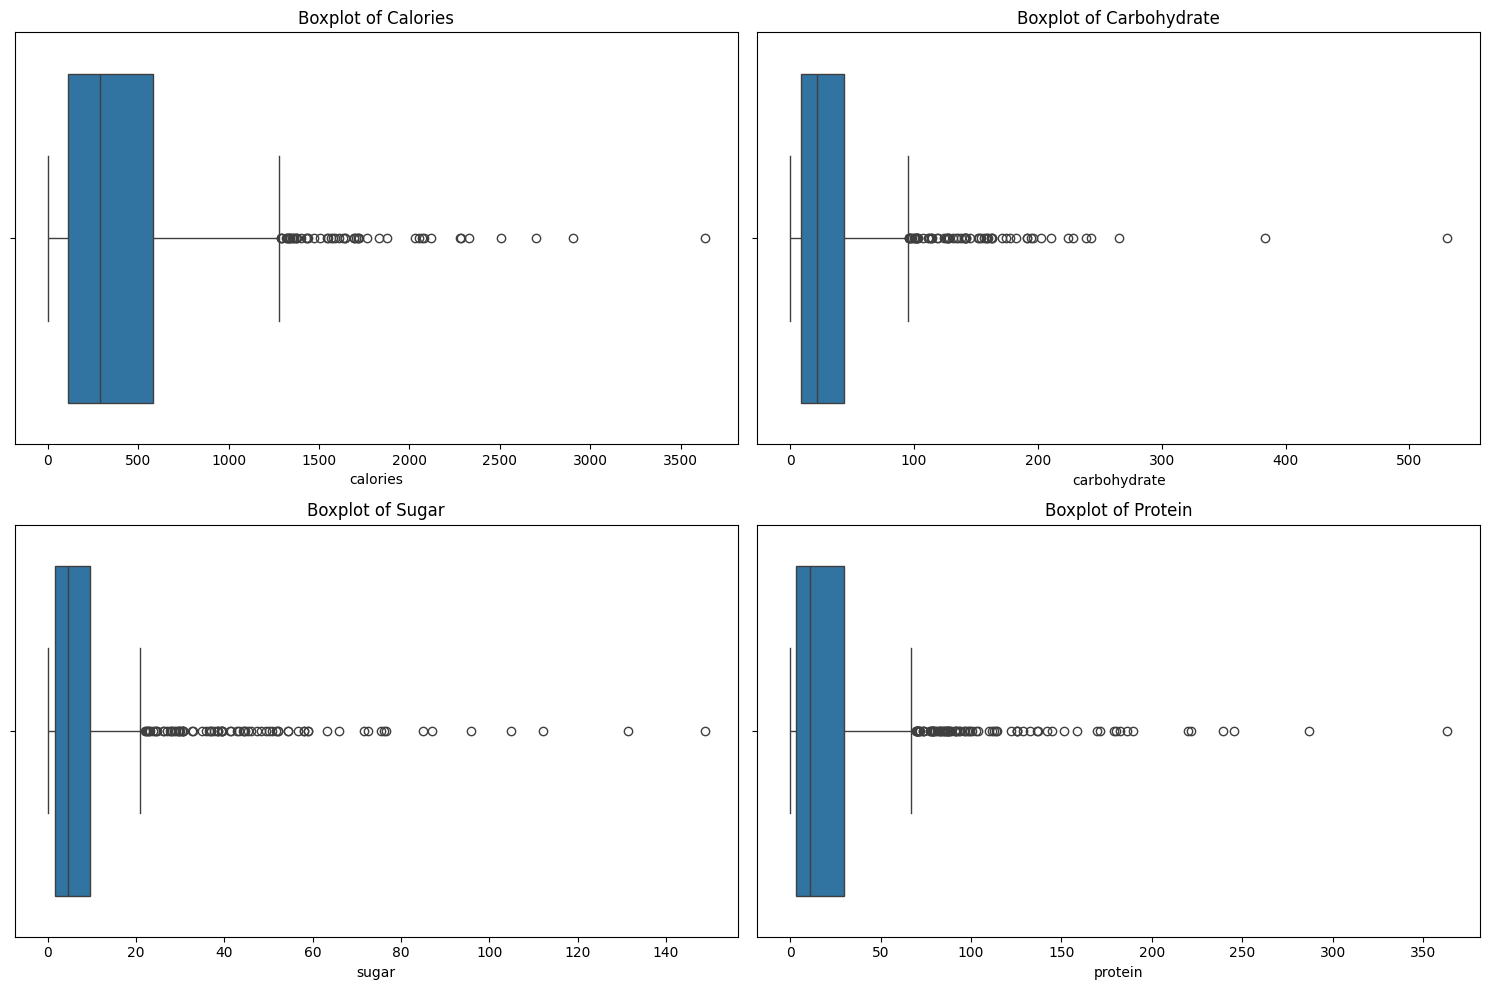


Descriptive Statistics after handling outliers


,calories,carbohydrate,sugar,protein
count,922.000000,922.000000,922.000000,922.000000
mean,427.007121,33.839844,8.650024,23.197935
std,424.673056,37.933254,12.727595,32.436193
min,2.998900,0.231000,0.092100,0.030000
25%,113.325000,8.832500,1.722500,3.362500
50%,288.550000,21.480000,4.550000,10.800000
75%,581.535000,43.605000,9.597500,29.495000
max,2064.556700,195.476600,74.852100,179.883600


In [38]:
# Detecting outliers using boxplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(ax=axes[0, 0], x=df['calories'])
axes[0, 0].set_title('Boxplot of Calories')

sns.boxplot(ax=axes[0, 1], x=df['carbohydrate'])
axes[0, 1].set_title('Boxplot of Carbohydrate')

sns.boxplot(ax=axes[1, 0], x=df['sugar'])
axes[1, 0].set_title('Boxplot of Sugar')

sns.boxplot(ax=axes[1, 1], x=df['protein'])
axes[1, 1].set_title('Boxplot of Protein')

plt.tight_layout()
plt.show()

# Handling outliers by capping them to the 1st and 99th percentiles
for col in ['calories', 'carbohydrate', 'sugar', 'protein']:
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


# Descriptive Statistics after handling outliers
print("")
print("Descriptive Statistics after handling outliers")
df.describe()

**Distribution of each Numerical columns**

The image below contains histograms for Calories, Carbohydrate, Sugar, and Protein, showing the frequency distributions of these variables.

The data for all variables shows a right-skewed distribution, with the majority of values concentrated at lower ranges. Also, there are relatively fewer items with high calories, carbohydrates, sugar, or protein, as indicated by the long tails.

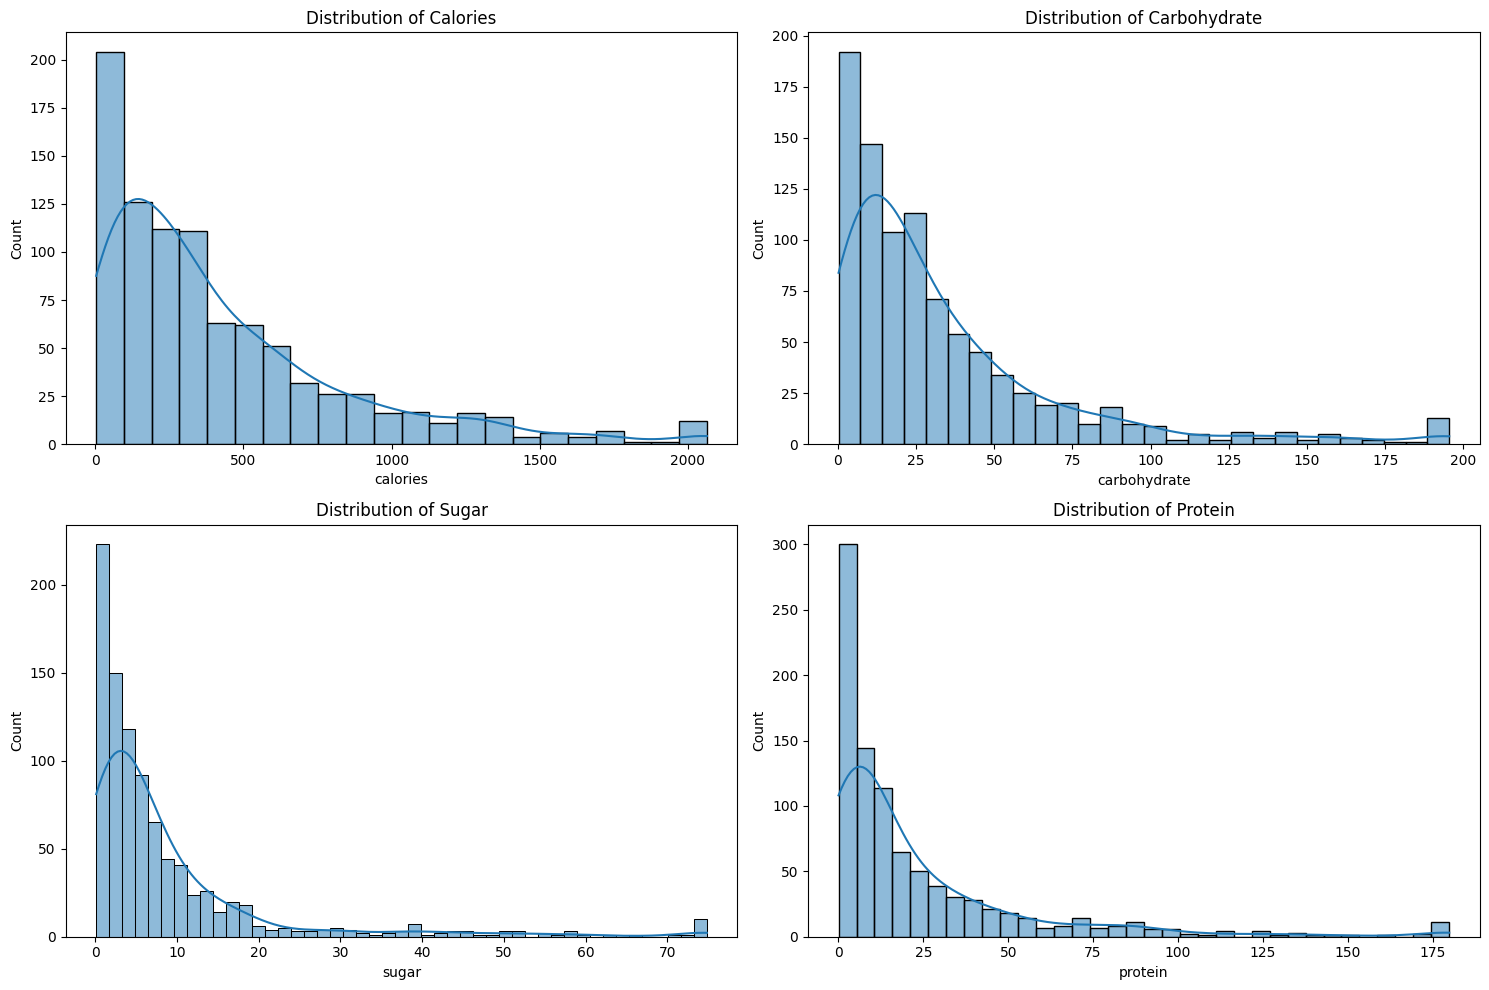

In [39]:
# Plotting distribution for each numerical column
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(ax=axes[0, 0], data=df, x='calories', kde=True)
axes[0, 0].set_title('Distribution of Calories')

sns.histplot(ax=axes[0, 1], data=df, x='carbohydrate', kde=True)
axes[0, 1].set_title('Distribution of Carbohydrate')

sns.histplot(ax=axes[1, 0], data=df, x='sugar', kde=True)
axes[1, 0].set_title('Distribution of Sugar')

sns.histplot(ax=axes[1, 1], data=df, x='protein', kde=True)
axes[1, 1].set_title('Distribution of Protein')

plt.tight_layout()
plt.show()

**Categorical Variables - category, servings**

The bar chart below clearly shows that the most prevalent recipe category is Breakfast. Additionally, the most frequent serving size is 4, indicating that this portion size is the most commonly used in the dataset.

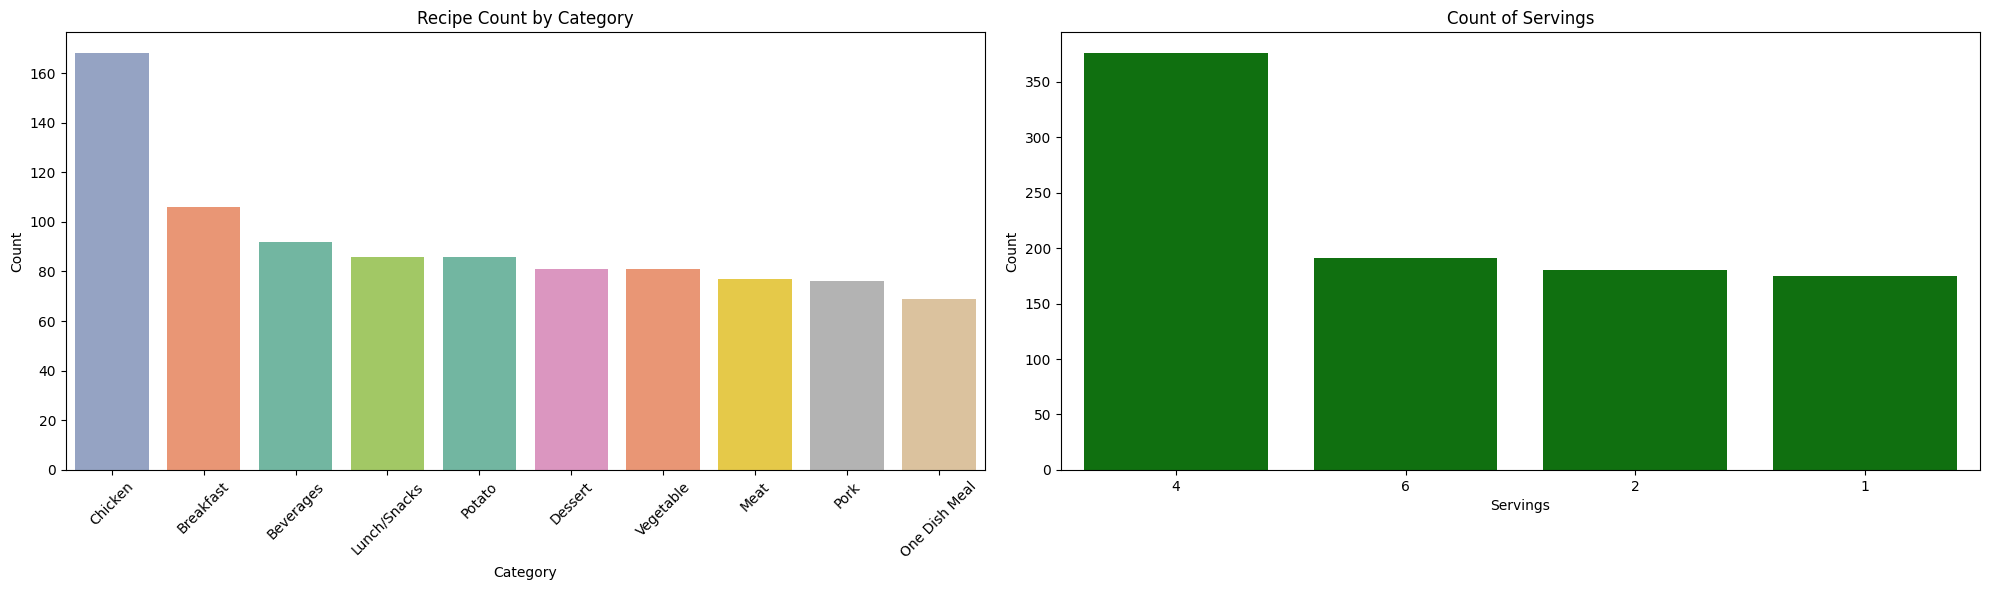

In [40]:
# Plotting recipe count by category and servings ordered by count descending
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Recipe count by category
category_order = df['category'].value_counts().index
sns.countplot(ax=axes[0], data=df, x='category', order=category_order, palette='Set2', hue='category')
axes[0].set_title('Recipe Count by Category')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Visualize the serving count
servings_order = df['servings'].value_counts().index
sns.countplot(ax=axes[1], data=df, x='servings', order=servings_order, color='green')
axes[1].set_title('Count of Servings')
axes[1].set_xlabel('Servings')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

**Correlation Analysis Between Calories, Protein, Carbohydrates, and Sugar:**

The scatterplots show the relationships between calories and protein, carbohydrates, and sugar, with points colored by traffic levels (high or low).

Calories vs. Protein: High-traffic recipes are distributed across various protein levels, with no strong clustering. Calories vs. Carbohydrates: Recipes with higher calories and carbohydrates seem more associated with high traffic, but the spread is wide. Calories vs. Sugar: There is no clear pattern linking sugar content and traffic level, with high-traffic recipes scattered throughout.

Overall, high traffic does not strongly correlate with any specific calorie-nutrient combination.

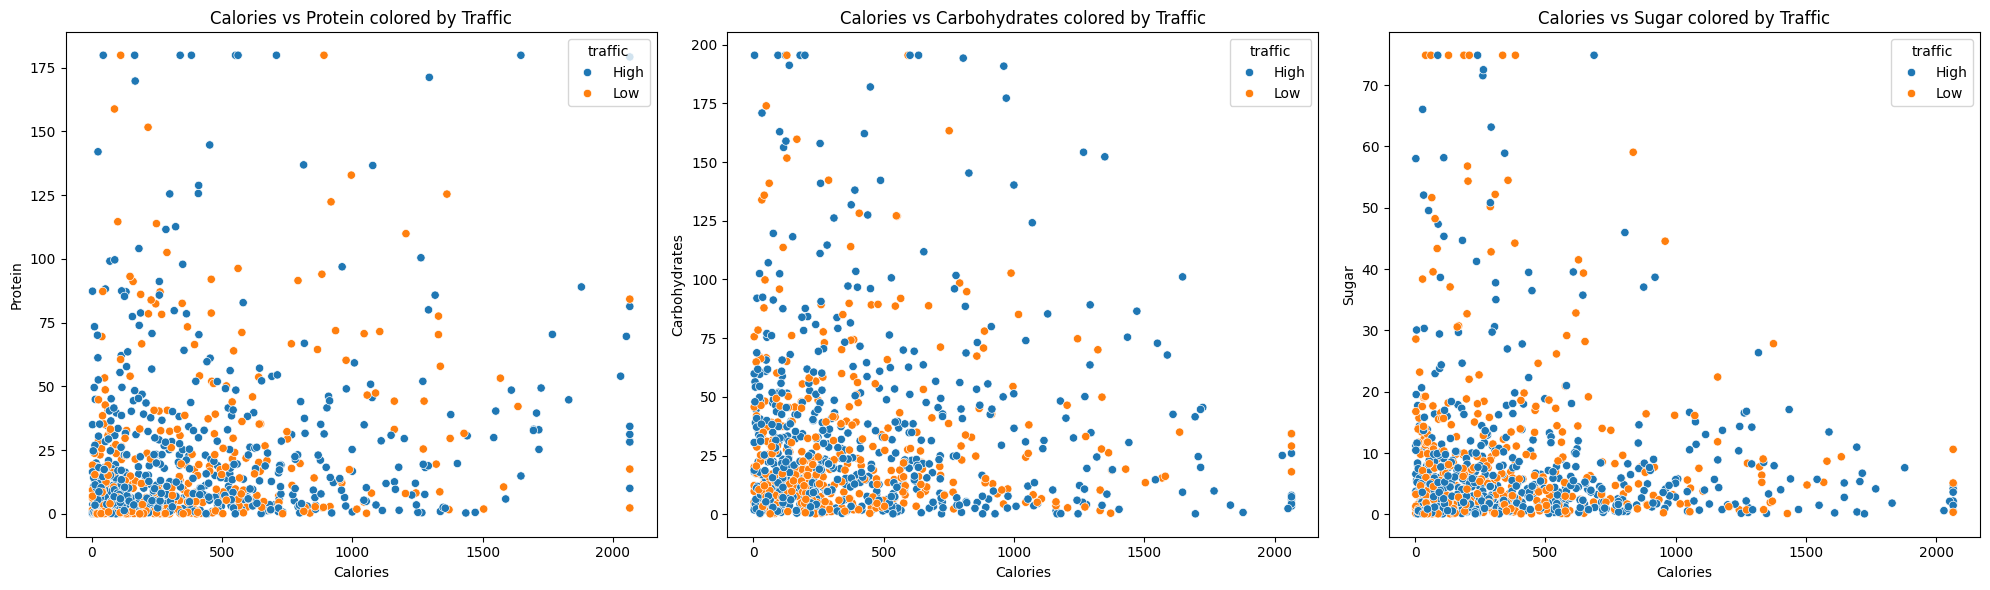

In [41]:
# Plotting Calories vs Protein, Calories vs Carbohydrates, and Calories vs Sugar colored by high_traffic

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Calories vs Protein
sns.scatterplot(ax=axes[0], data=df, x='calories', y='protein', hue='traffic')
axes[0].set_title('Calories vs Protein colored by Traffic')
axes[0].set_xlabel('Calories')
axes[0].set_ylabel('Protein')

# Calories vs Carbohydrates
sns.scatterplot(ax=axes[1], data=df, x='calories', y='carbohydrate', hue='traffic')
axes[1].set_title('Calories vs Carbohydrates colored by Traffic')
axes[1].set_xlabel('Calories')
axes[1].set_ylabel('Carbohydrates')

# Calories vs Sugar
sns.scatterplot(ax=axes[2], data=df, x='calories', y='sugar', hue='traffic')
axes[2].set_title('Calories vs Sugar colored by Traffic')
axes[2].set_xlabel('Calories')
axes[2].set_ylabel('Sugar')

plt.tight_layout()
plt.show()

**Target vairable:**

As our goal is to predict which recipes will attract traffic, the traffic variable serves as our target. The chart below illustrates the distribution of the High and Low categories within this variable. It reveals an imbalance in the dataset, with 60% of the data classified as High and 40% as Low. This imbalance may influence model performance and requires consideration during analysis.

traffic
High    60.086768
Low     39.913232
Name: count, dtype: float64



Text(0, 0.5, 'Count')

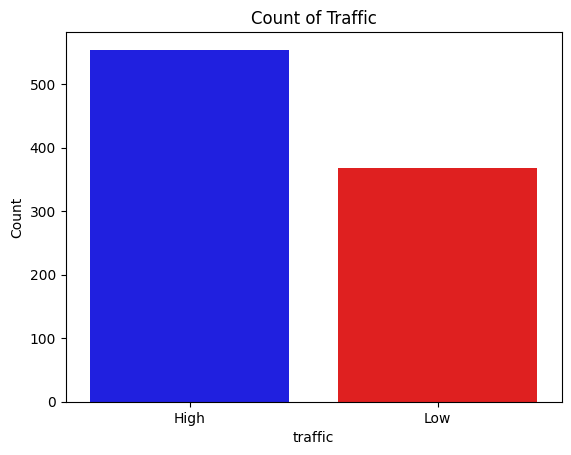

In [42]:
# Target vairable: Traffic Percentage
value_counts = df['traffic'].value_counts()
percentage = (value_counts / value_counts.sum()) * 100
print(percentage)
print("")

# Visualize the traffic variable
cou = sns.countplot(x='traffic', data=df, palette=['blue', 'red'], hue='traffic')
cou.set_title('Count of Traffic')
plt.ylabel('Count')

**Numeric Variables: calories, carbohydrate, sugar, protein (Correlation)**

The heatmap below highlights key relationships among variables. Notably, there is a positive correlation between protein and calories, indicating that higher protein content tends to be associated with higher calorie values. Conversely, a negative correlation is observed between protein and sugar, suggesting that as protein levels increase, sugar content tends to decrease.

Text(0.5, 1.0, 'The Correlation Heatmap between Numeric Variables')

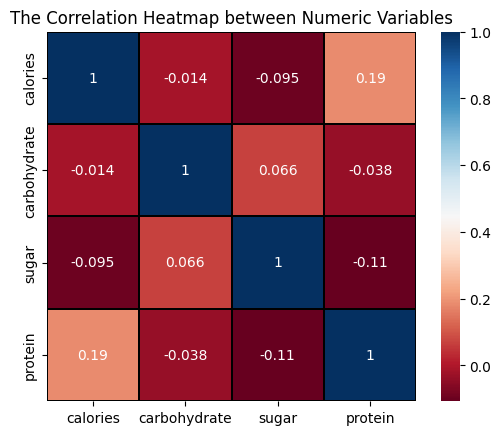

In [43]:
# Correlation between the numerical variables

non_numeric_columns = df.select_dtypes(exclude=['number']).columns
data_non_num = df.drop(columns=non_numeric_columns)
heat=sns.heatmap(data_non_num.corr(), annot=True, linewidth=0.01, square=True, cmap="RdBu", linecolor="black")
heat.set_title("The Correlation Heatmap between Numeric Variables")

**Relationship between Numeric Variables & Target - calories, carbohydrate, sugar, protein & traffic**

To explore the relationship between the target variable traffic and numerical variables such as calories, carbohydrate, sugar, and protein, I created barplots for the analysis. From the barplots below, it is evident that the high traffic category tends to have higher levels of calories, carbohydrates, and protein compared to the low traffic category. Conversely, the low traffic category shows higher levels of sugar, likely reflecting a preference for less sweet foods in popular recipes.



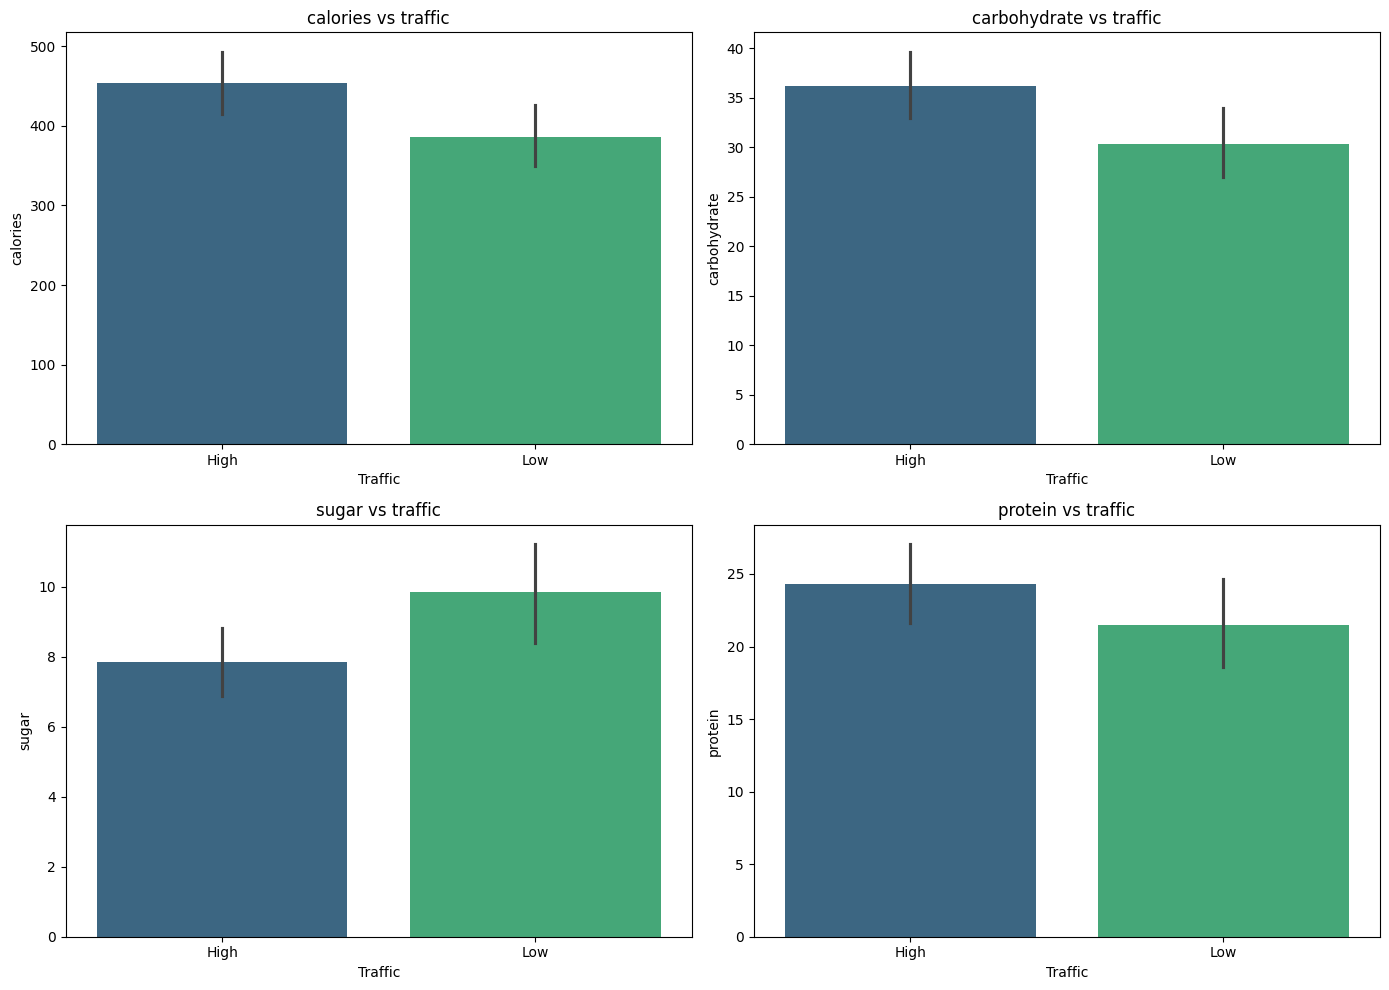

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, col in zip(axes.flatten(), data_non_num.columns):
    bar = sns.barplot(ax=ax, data=df, x="traffic", y=col, palette="viridis", hue='traffic')
    bar.set(xlabel="Traffic", ylabel=col, title=col + ' vs traffic')

plt.tight_layout()
plt.show()

**Distribution between Categorical Variables & Target - category, servings & traffic**

The charts below illustrates the distributions of traffic, category, and number of servings. A clear relationship is observed between the traffic and category variables, with recipes in categories showing a high traffic being associated with categories having low traffic, and vice versa. Regarding the distribution between traffic and number of servings, the high traffic category consistently appears as the most frequent, suggesting that larger serving sizes are more likely to attract higher traffic.

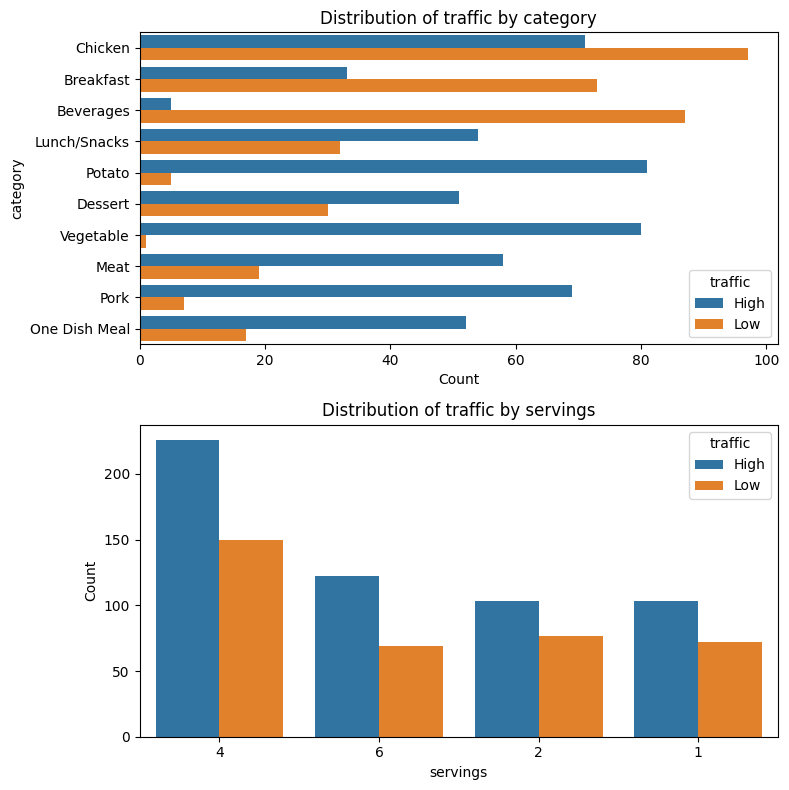

In [45]:
# Create a figure with 2 subplots arranged in 1 column and 2 rows, and set the figure size
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

# Create a count plot for the 'category' variable with 'traffic' as the hue, and set the title and x-axis label
cou1 = sns.countplot(ax=axes[0], data=df, y="category", hue="traffic", order=df['category'].value_counts().index)
cou1.set_title('Distribution of traffic by category')
axes[0].set_xlabel('Count')

# Create a count plot for the 'servings' variable with 'traffic' as the hue, and set the title and y-axis label
cou2 = sns.countplot(ax=axes[1], x='servings', data=df, hue="traffic", order=df['servings'].value_counts().index)
cou2.set_title('Distribution of traffic by servings')
axes[1].set_ylabel('Count')

# Adjust the layout to prevent overlap and improve the appearance
plt.tight_layout()

# Display the plots
plt.show()

# **Model Development:**

Predicting high traffic levels is a binary classification problem in machine learning. For this task, I have chosen the Logistic Regression model as my primary method due to its simplicity and interpretability. Logistic Regression is well-suited for binary classification tasks, making it an ideal choice for predicting high or low traffic.

In addition, I have selected the Random Forest model as a comparative approach. Random Forest is an ensemble learning algorithm that aggregates multiple decision trees, providing higher accuracy and greater resilience to overfitting compared to a single Decision Tree classifier. This combination of models allows us to assess both the simplicity of Logistic Regression and the robustness of Random Forest.

**Prepare Data for Modelling**

For modeling purposes, I selected calories, carbohydrate, sugar, protein, servings, and category as features, with traffic as the target variable. Also, Additionally, I included a standard deviation (std) column among the numerical columns to enhance the model's performance. This addition helps capture the variability within the data, providing a more comprehensive view of the features and potentially improving the accuracy of predictions.

**Preprocessing steps:**

Encoded categorical features.
Scaled numerical features.
Split the dataset into training and test sets

In [46]:
# Encoding categorical variables

df = pd.get_dummies(df, columns=['category'])

df['servings'] = df['servings'].astype('int')

label_encoder = LabelEncoder()
df['traffic'] = label_encoder.fit_transform(df['traffic'])

columns_to_std = ['calories','carbohydrate', 'sugar', 'protein']

# Calculate standard deviation for the selected columns and add a new 'std' column
df['std'] = df[columns_to_std].apply(lambda row: np.std(row), axis=1)

column_order = ['calories',  'carbohydrate',   'sugar',  'protein','std' , 'servings','category_Beverages'  ,'category_Breakfast' , 'category_Chicken' ,  'category_Dessert' , 'category_Lunch/Snacks' ,'category_Meat',  'category_One Dish Meal',  'category_Pork',  'category_Potato', 'category_Vegetable' ,'traffic']
df = df[column_order]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 922 entries, 1 to 947
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   calories                922 non-null    float64
 1   carbohydrate            922 non-null    float64
 2   sugar                   922 non-null    float64
 3   protein                 922 non-null    float64
 4   std                     922 non-null    float64
 5   servings                922 non-null    int64  
 6   category_Beverages      922 non-null    bool   
 7   category_Breakfast      922 non-null    bool   
 8   category_Chicken        922 non-null    bool   
 9   category_Dessert        922 non-null    bool   
 10  category_Lunch/Snacks   922 non-null    bool   
 11  category_Meat           922 non-null    bool   
 12  category_One Dish Meal  922 non-null    bool   
 13  category_Pork           922 non-null    bool   
 14  category_Potato         922 non-null    bool   

**Splitting Data & Scaling the numeric features**

In [47]:
# Define X variables and our target(y)
X = df.drop(["traffic"], axis=1).values
y = df["traffic"].values

numeric_features = X[:, :5]

# Standardization
st_scaler = StandardScaler()
st_scaler.fit(numeric_features)
numeric_features_scaler = st_scaler.transform(numeric_features)

X_scaler = np.concatenate((numeric_features_scaler, X[:, 5:]), axis=1)

# splited the data into 20% test data and 80% training data.
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size= 0.20, random_state=10)

# **Model Evaluation**

For evaluation, I have chosen Precision, Recall, and F1 Score as key metrics.

Precision measures the percentage of true positives among the predicted positives, providing insight into the accuracy of positive predictions. Recall evaluates the percentage of true positives identified out of the actual positives, reflecting the model's ability to detect relevant cases. F1 Score is the harmonic mean of Precision and Recall, offering a balanced metric that accounts for both false positives and false negatives.

These metrics together provide a comprehensive understanding of the model’s performance.

**Logistic Regrssion Model**

Logistic Regression Model

Confusion Matrix:
 [[85 20]
 [27 53]]

Classification report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.78       105
           1       0.73      0.66      0.69        80

    accuracy                           0.75       185
   macro avg       0.74      0.74      0.74       185
weighted avg       0.74      0.75      0.74       185



LR_accuracy: 0.745945945945946

Area under the ROC curve: 0.81

Train Accuracy: 0.77
Test Accuracy: 0.75



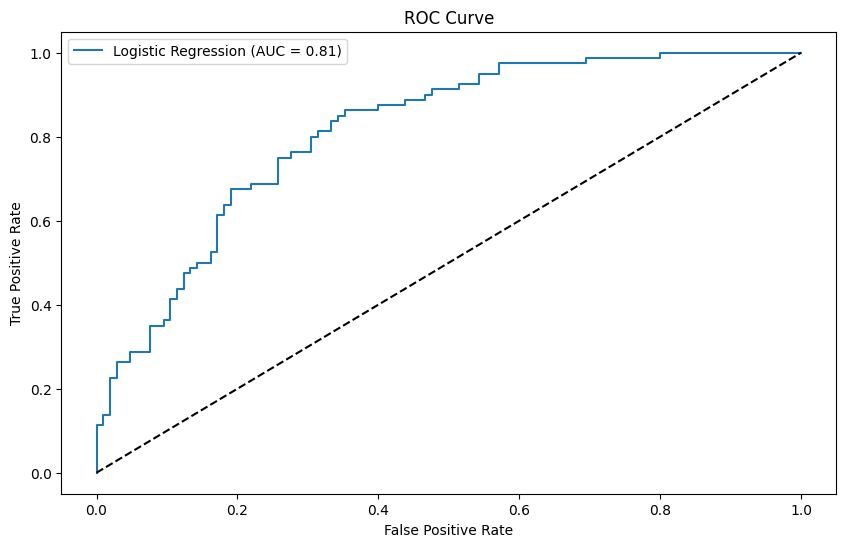

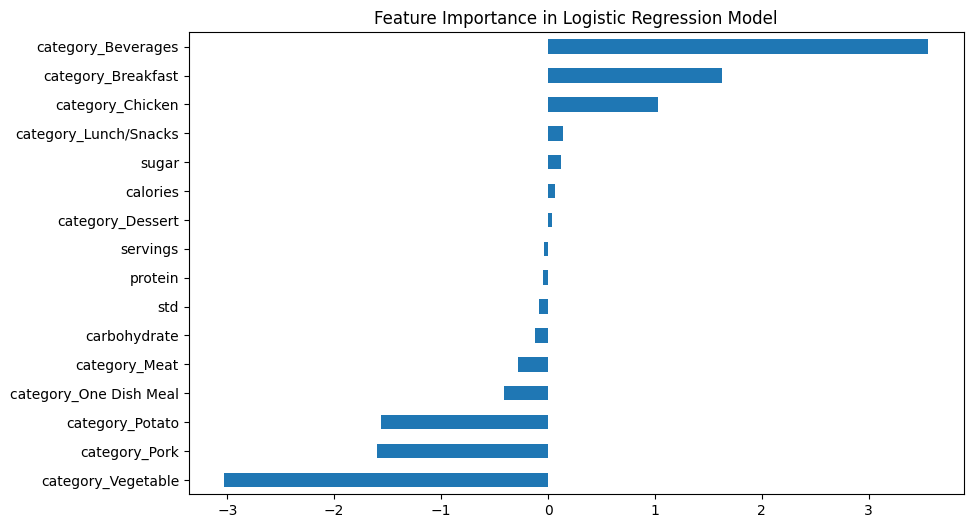

In [48]:
# Model Evaluation

# Logistic Regrssion Model

logistic_model = LogisticRegression(max_iter=1000, C=5)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

# Confusion Matrix and Classification Report
print("Logistic Regression Model\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print()

# Logistic Regression Model Accuracy
LR_accuracy = accuracy_score(y_test, y_pred)
print("\nLR_accuracy:", LR_accuracy)

# ROC-AUC: Calculating the area under the curve
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
print("")
print(f"Area under the ROC curve: {roc_auc:.2f}")

# Accuracy Score
train_accuracy = logistic_model.score(X_train, y_train)
test_accuracy = logistic_model.score(X_test, y_test)
print("")
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print("")

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()
print("")


# Feature Importance
importances = pd.Series(logistic_model.coef_[0], index=df.drop(["traffic"], axis=1).columns)
sorted_importances = importances.sort_values()
plt.figure(figsize=(10, 6))
plt.grid(False)
sorted_importances.plot(kind='barh')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()

**Random Forest Model**


Random Forest Model

Confusion Matrix:
 [[85 20]
 [35 45]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.81      0.76       105
           1       0.69      0.56      0.62        80

    accuracy                           0.70       185
   macro avg       0.70      0.69      0.69       185
weighted avg       0.70      0.70      0.70       185


RF_accuracy: 0.7027027027027027

Area under the ROC curve: 0.77

Train Accuracy: 0.89
Test Accuracy: 0.70


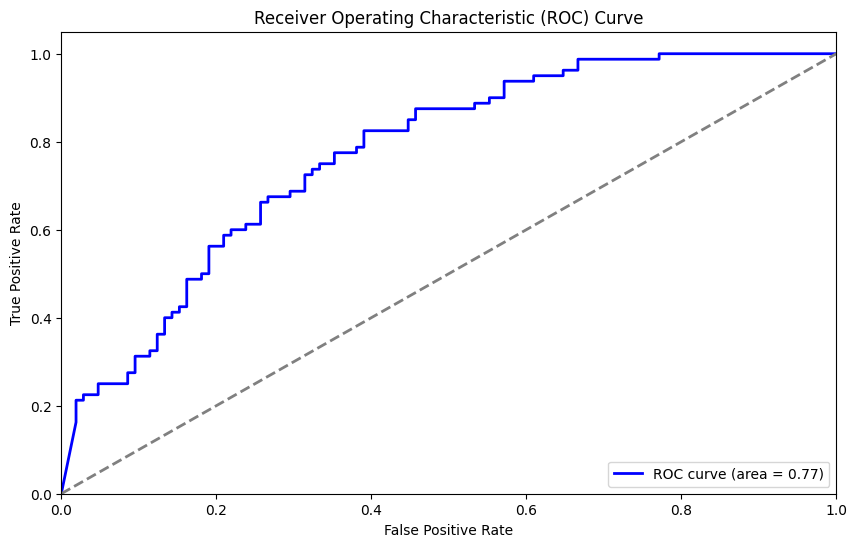

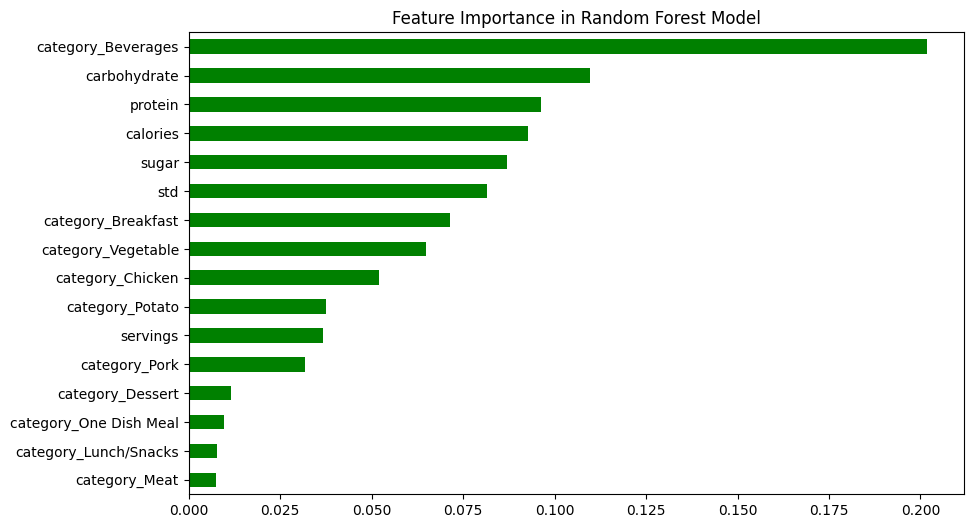

In [49]:
# Random Forest Model

random_forest_model = RandomForestClassifier(n_estimators=10, max_depth=10, min_samples_split=3, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)
y_pred_proba = random_forest_model.predict_proba(X_test)[:, 1]

# Random Forest Model Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Confusion Matrix and Classification Report
print("\nRandom Forest Model\n")
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Random Forest Model Accuracy
RF_accuracy = accuracy_score(y_test, y_pred)
print("\nRF_accuracy:", RF_accuracy)

# Calculating the area under the curve (ROC-AUC)
y_pred_proba = random_forest_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
print("")
print(f"Area under the ROC curve: {roc_auc:.2f}")

# Accuracy of the train and test data
train_accuracy = accuracy_score(y_train, random_forest_model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)
print("")
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# ROC Curve and AUC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(False)
plt.show()
print("")

# Feature Importance
importances = pd.Series(random_forest_model.feature_importances_, index=column_order[:-1])
sorted_importances = importances.sort_values()
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='barh', color='green')
plt.title('Feature Importance in Random Forest Model')
plt.grid(False)
plt.show()

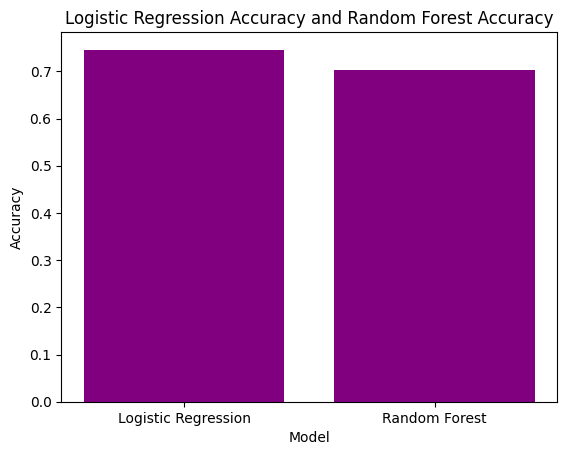

In [50]:
# Define the accuracy of the models
#LR_accuracy =  0.74
#RF_accuracy = 0.70

# Define the names of the models
model_names = ['Logistic Regression', 'Random Forest']

# Create a range object for the x-axis positions
x = range(len(model_names))

# Define the accuracies in a list
accuracies = [LR_accuracy, RF_accuracy]

# Create a bar plot with the model names as labels and accuracies as heights
plt.bar(x, accuracies, tick_label=model_names, color='purple')

# Label the x-axis
plt.xlabel('Model')

# Label the y-axis
plt.ylabel('Accuracy')

# Disable the grid
plt.grid(False)

# Set the title of the plot
plt.title('Logistic Regression Accuracy and Random Forest Accuracy')

# Display the plot
plt.show()

**Result**

The Precision, Recall, and F1 Score for predicting high traffic using the Logistic Regression model are 0.75, 0.81, and 0.78, respectively, while the Random Forest model achieves 0.71, 0.81, and 0.76. This indicates that the Logistic Regression model provides a better fit to the features and has lower prediction errors compared to the Random Forest model.

# **Business Metric**

**Business Goal:** Increase prediction accuracy of high-traffic recipes to 80%. To evaluate model performance, the accuracy of predictions for high-traffic recipes is used as a KPI.

**Model Comparison**

Logistic Regression: Achieved 74% accuracy
Random Forest Classifier: Slightly lower accuracy at 70%.
The Logistic Regression Classifier performs better for predicting high-traffic recipes based on this metric.

# **Summary and Recommendations**

**Summary**

The Logistic Regression model achieved a 74% accuracy in predicting the most popular items. The feature importance plot highlights that the Beverages category, Breakfast category, and protein content are the most influential factors. Based on this, I recommend that Tasty Bytes focus on developing recipes that emphasize these categories while ensuring dishes are high in protein and have lower calorie and sugar levels.


**Recommendation**

Focus Areas: Emphasize recipes in the Beverages, Breakfast, and Chicken categories, as these are key traffic drivers.
Recipe Characteristics: Develop recipes with high protein content while maintaining lower calorie and sugar levels to align with user preferences and trends.
Traffic Strategy: Prioritize these categories to attract more visitors and boost website engagement.
Achieving 80% accuracy with the model is feasible through enhanced data collection practices. A key challenge was the presence of a significant amount of missing data, which required feature engineering to fill gaps and enable accurate predictions.
Implementing a system for regular model retraining to keep the model updated with the latest data. Since user preferences can change over time, this will help ensure that the model maintains its predictive accuracy and continues to provide valuable insights.